# <center> Statistical Network Analysis Deezer

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter 
import json
% matplotlib inline


Idées : 

I) Etude de chaque dataset <=> Visualisation

Visualisation par Cluster de musique :
- Plus gros le cercle est et plus de user en choix numéro 1 pour ce style
- Liens entre style : Dans chaque cluster : On étudie pour chaque user le nombre de liens amicaux des styles majoritaires. En itérant sur chaque user on construit une proba empirique de liens d'amitiés entre users. 

Visualisation par users : 
- Mise en place de "supers_users" partageant les deux/trois premiers styles en commun => plus le cercle est gros plus de users sont à l'intérieur
- Edges : liens d'amitié moyen entre super users

Mise en place d'une notion de centralité : 
- degree centrality => Evaluer la répartition en degré dans chaque cluster genre (degré = nombre d'amis)
- 

II) Comparaison des deux Datasets 

- Comparer la distribution en degrés


III) Recommendation (globale ou pas fonction de la partie d'avant)
- (Mettre en place une probabilité d'amitié)
-  Mettre en place une recommandation de style musical (content based recommendation)



In [2]:
path='data/'

In [3]:
edges_RO = pd.read_csv(path+"RO_edges.csv",sep=',')

## Statistiques descriptives

En moyenne, combien de genres aiment un utilisateur?

In [4]:
json_RO = open(path + 'RO_genres_super_users.json').read()
json_RO_data = json.loads(json_RO)
json_RO_data

[{'genres': ['Films/Games',
   'Dance',
   'Pop',
   'International Pop',
   'Techno/House',
   'R&B',
   'Contemporary R&B',
   'Film Scores',
   'Electro'],
  'id': '0'},
 {'genres': ['Reggae',
   'Electro',
   'Dance',
   'Rap/Hip Hop',
   'Metal',
   'Pop',
   'East Coast',
   'Techno/House',
   'Rock',
   'Alternative',
   'Hard Rock'],
  'id': '1'},
 {'genres': ['Pop'], 'id': '2'},
 {'genres': ['Dance', 'Rap/Hip Hop', 'Pop', 'Disco', 'Alternative', 'Electro'],
  'id': '3'},
 {'genres': ['Dance',
   'Rap/Hip Hop',
   'Contemporary R&B',
   'Pop',
   'Disco',
   'International Pop',
   'R&B',
   'Rock',
   'Alternative',
   'Electro',
   'Singer & Songwriter'],
  'id': '4'},
 {'genres': ['Alternative', 'Pop'], 'id': '5'},
 {'genres': ['Dance', 'Films/Games', 'Pop'], 'id': '6'},
 {'genres': ['Dance', 'Rap/Hip Hop', 'Electro', 'Pop', 'Techno/House'],
  'id': '7'},
 {'genres': ['R&B',
   'International Pop',
   'Rap/Hip Hop',
   'Pop',
   'Dance',
   'Contemporary R&B',
   'Electro'],

In [5]:
number_genres_RO = pd.DataFrame(columns=['id', 'liked_genres'])
for user in json_RO_data:
#     print(k,v)
    number_genres_RO = number_genres_RO.append({
        'id': user['id'], 
        'liked_genres': len(user['genres'])
    }, ignore_index=True)

In [6]:
number_genres_RO.head()

,id,liked_genres
0,0,9
1,1,11
2,2,1
3,3,6
4,4,11


In [7]:
number_genres_RO['liked_genres'].mean()

6.0357647284130902

In [8]:
number_genres_RO['liked_genres'].min()

1

In [9]:
number_genres_RO['liked_genres'].max()

52

# Super user 

In [10]:
new_data = []
length = 3

# On travaille les données pour ne récuperer que les 'length' premiers genres de chaque user
for user in json_RO_data:
    if len(user['genres'])<length :
        while len(user['genres'])<length:
            user['genres'].append('')
    elif len(user['genres'])>length:
        user['genres'] = user['genres'][:length]
        
    new_data.append(user)
new_data

[{'genres': ['Films/Games', 'Dance', 'Pop'], 'id': '0'},
 {'genres': ['Reggae', 'Electro', 'Dance'], 'id': '1'},
 {'genres': ['Pop', '', ''], 'id': '2'},
 {'genres': ['Dance', 'Rap/Hip Hop', 'Pop'], 'id': '3'},
 {'genres': ['Dance', 'Rap/Hip Hop', 'Contemporary R&B'], 'id': '4'},
 {'genres': ['Alternative', 'Pop', ''], 'id': '5'},
 {'genres': ['Dance', 'Films/Games', 'Pop'], 'id': '6'},
 {'genres': ['Dance', 'Rap/Hip Hop', 'Electro'], 'id': '7'},
 {'genres': ['R&B', 'International Pop', 'Rap/Hip Hop'], 'id': '8'},
 {'genres': ['Dance', '', ''], 'id': '9'},
 {'genres': ['International Pop', 'Techno/House', 'Electro'], 'id': '10'},
 {'genres': ['R&B', 'Pop', ''], 'id': '11'},
 {'genres': ['International Pop', 'Trance', 'Pop'], 'id': '12'},
 {'genres': ['Pop', '', ''], 'id': '13'},
 {'genres': ['Rap/Hip Hop', 'Alternative', 'Metal'], 'id': '14'},
 {'genres': ['Dance', 'Alternative', 'Pop'], 'id': '15'},
 {'genres': ['Dance', 'Trance', 'Alternative'], 'id': '16'},
 {'genres': ['Internation

In [11]:
len(new_data)

41773

In [12]:
def get_super_user_by_genres(super_users, genres):
    if(len(super_users)>0):
        for super_user in super_users:
            same_genres = compare(super_user['genres'], genres)
            if same_genres:
                return super_user
    return None

def compare(s, t):
    return Counter(s) == Counter(t)
    
super_users = []
i=0
for user in new_data:
    super_user = get_super_user_by_genres(super_users, user['genres'])
    if not super_user:
        super_users.append({
            'id_super_user': i,
            'genres': user['genres'],
            'ids': [user['id']]
        })
        i += 1
    else :
        super_user['ids'].append(user['id'])
super_users

[{'genres': ['Films/Games', 'Dance', 'Pop'],
  'id_super_user': 0,
  'ids': ['0',
   '6',
   '318',
   '402',
   '411',
   '751',
   '1030',
   '1182',
   '2099',
   '2846',
   '2958',
   '2959',
   '3351',
   '3742',
   '3811',
   '3889',
   '4145',
   '4659',
   '4662',
   '4668',
   '5242',
   '5425',
   '5553',
   '5577',
   '5658',
   '5923',
   '5997',
   '6362',
   '6370',
   '6445',
   '6475',
   '7258',
   '7390',
   '7424',
   '7453',
   '7818',
   '7916',
   '8218',
   '8754',
   '9073',
   '9509',
   '9597',
   '9667',
   '9802',
   '9844',
   '9878',
   '10553',
   '10623',
   '10855',
   '11139',
   '11188',
   '11578',
   '12084',
   '12104',
   '12498',
   '12534',
   '12934',
   '12962',
   '13008',
   '13174',
   '13386',
   '13687',
   '13722',
   '13816',
   '14160',
   '14356',
   '14832',
   '14977',
   '15248',
   '15281',
   '15394',
   '15396',
   '15893',
   '16222',
   '16268',
   '16271',
   '16546',
   '16828',
   '16866',
   '16879',
   '17113',
   '17372'

In [13]:
len(super_users)

2139

On enregistre les résultats dans un fichier json

In [14]:
with open(path+'super_user_RO.json', 'w') as f:
    f.write(json.dumps(super_users, indent=4))


On récupère les résultats du fichier json

In [15]:
with open(path+'super_user_RO.json', 'r') as f:
    super_users = json.load(f)
super_users

[{'genres': ['Films/Games', 'Dance', 'Pop'],
  'id_super_user': 0,
  'ids': ['0',
   '6',
   '318',
   '402',
   '411',
   '751',
   '1030',
   '1182',
   '2099',
   '2846',
   '2958',
   '2959',
   '3351',
   '3742',
   '3811',
   '3889',
   '4145',
   '4659',
   '4662',
   '4668',
   '5242',
   '5425',
   '5553',
   '5577',
   '5658',
   '5923',
   '5997',
   '6362',
   '6370',
   '6445',
   '6475',
   '7258',
   '7390',
   '7424',
   '7453',
   '7818',
   '7916',
   '8218',
   '8754',
   '9073',
   '9509',
   '9597',
   '9667',
   '9802',
   '9844',
   '9878',
   '10553',
   '10623',
   '10855',
   '11139',
   '11188',
   '11578',
   '12084',
   '12104',
   '12498',
   '12534',
   '12934',
   '12962',
   '13008',
   '13174',
   '13386',
   '13687',
   '13722',
   '13816',
   '14160',
   '14356',
   '14832',
   '14977',
   '15248',
   '15281',
   '15394',
   '15396',
   '15893',
   '16222',
   '16268',
   '16271',
   '16546',
   '16828',
   '16866',
   '16879',
   '17113',
   '17372'

In [16]:
super_users[-1]

{'genres': ['Dirty South', 'Films/Games', 'Kids'],
 'id_super_user': 2138,
 'ids': ['41753']}

In [17]:
list_id_users = edges_RO['node_1'].unique()

In [18]:
edges_by_users = edges_RO.groupby('node_1')['node_2'].apply(list)
edges_by_users

node_1
0                                     [37825, 17224, 6356]
1        [18053, 31265, 28257, 41010, 19010, 10785, 416...
2                                            [4661, 35935]
3        [22504, 27665, 13675, 9462, 20943, 5842, 36937...
4                                           [35041, 16026]
5        [17311, 886, 5112, 21465, 31989, 10076, 14587,...
6                                                   [7640]
7        [34808, 37314, 22280, 14353, 6950, 2759, 27931...
8                                           [22889, 34909]
9                                           [15747, 15691]
10       [10338, 26732, 24103, 31127, 23917, 20276, 395...
11                                    [4125, 27819, 35406]
12                                    [21484, 3308, 29938]
13       [39334, 29378, 34674, 25231, 19991, 32016, 375...
14               [20407, 20243, 3099, 12199, 35966, 35945]
15                                           [8827, 34585]
16                                          [2520

In [19]:
len(edges_by_users)

32498

In [20]:
#create super users adjacency matrix
super_users_adj = np.zeros((len(super_users),len(super_users)))

In [22]:
def find_super_user(super_users, id_user):
    for super_user in super_users:
        for user_id in super_user['ids']:
            if int(user_id) == int(id_user):
                return super_user['id_super_user']
    print("None find : super_users", super_users, "; id_user", id_user)
    return None

for i in range(len(edges_by_users)):
    id_user = list_id_users[i]
    super_user_row = find_super_user(super_users, id_user)
    for id_friend in edges_by_users[id_user]:
        super_friend_column = find_super_user(super_users, id_friend)
        #print('id_user', id_user,
        #      'id_friend', id_friend,
        #      'super_user_row', super_user_row,
        #      'super_friend_column', super_friend_column)
        super_users_adj[super_user_row, super_friend_column] += 1

In [23]:
super_users_adj

array([[    6.,     0.,    64., ...,     0.,     0.,     0.],
       [    0.,     0.,    11., ...,     0.,     0.,     0.],
       [   64.,     7.,  1683., ...,     2.,     0.,     0.],
       ..., 
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [24]:
np.max(super_users_adj)

1683.0

In [25]:
np.min(super_users_adj)

0.0

In [26]:
np.mean(super_users_adj)

0.027501021239821205

In [27]:
super_users_adj[super_user_row, super_friend_column]

13.0

In [28]:
super_users_adj.tofile('RO_super_users_adj.file')

We create the graph

In [29]:
nodes_list = []
nodes_size = []
edges_list = []
edges_size = []
nodes_labels = []

for i in range(len(super_users)):
    nodes_list.append(i)
    nodes_size.append(len(super_users[i]['ids']))
    nodes_labels.append(', '.join(super_users[i]['genres']))
    for j in range(len(super_users)):
        if super_users_adj[i,j] > 0:
            edges_list.append((i,j))
            edges_size.append(super_users_adj[i,j]/np.max(super_users_adj))

In [30]:
nodes_size_normalized = (nodes_size / np.max(nodes_size))*100

In [31]:
print( np.min(nodes_size_normalized) )

0.0204834084392


In [32]:
nodes_labels_dict = {}

for i in range(len(super_users)):
    nodes_labels_dict[i] = nodes_labels[i]

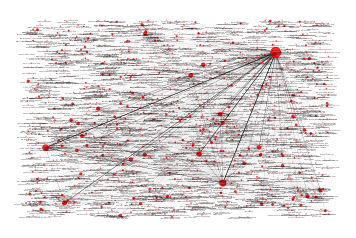

In [33]:
G=nx.Graph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edges_list)
# nodes_position = nx.fruchterman_reingold_layout(G) 
# nodes_position = nx.spring_layout(G) 
nodes_position = nx.random_layout(G) 

nx.draw_networkx_nodes(G,
                       nodes_position,
                       nodelist = nodes_list,
                       node_color = ['red'],
#                        node_size = nodes_size,
                       node_size = nodes_size_normalized,
                       alpha=0.8)

nx.draw_networkx_edges(G,
                       nodes_position,
                       edges_list,
                       width= edges_size)

nx.draw_networkx_labels(G,
                        nodes_position,
                        font_size=1,
                        labels = nodes_labels_dict)
                       
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig(path + "super_users_RO.png", dpi=1000, bbox_inches='tight')
plt.show()